In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [1]:
!cp '/content/drive/My Drive/surface.zip' ./

In [2]:
!unzip surface.zip

Streaming output truncated to the last 5000 lines.
  inflating: Positive/15001_1.jpg    
  inflating: Positive/15002_1.jpg    
  inflating: Positive/15003_1.jpg    
  inflating: Positive/15004_1.jpg    
  inflating: Positive/15005_1.jpg    
  inflating: Positive/15006_1.jpg    
  inflating: Positive/15007_1.jpg    
  inflating: Positive/15008_1.jpg    
  inflating: Positive/15009_1.jpg    
  inflating: Positive/15010_1.jpg    
  inflating: Positive/15011_1.jpg    
  inflating: Positive/15012_1.jpg    
  inflating: Positive/15013_1.jpg    
  inflating: Positive/15014_1.jpg    
  inflating: Positive/15015_1.jpg    
  inflating: Positive/15016_1.jpg    
  inflating: Positive/15017_1.jpg    
  inflating: Positive/15018_1.jpg    
  inflating: Positive/15019_1.jpg    
  inflating: Positive/15020_1.jpg    
  inflating: Positive/15021_1.jpg    
  inflating: Positive/15022_1.jpg    
  inflating: Positive/15023_1.jpg    
  inflating: Positive/15024_1.jpg    
  inflating: Positive/15025_1.jpg    

### Reading the images into a numpy array

In [3]:
import glob
negative_image = glob.glob('/content/Negative/*')
positive_image = glob.glob('/content/Positive/*')

In [4]:
negative_image[0]

'/content/Negative/08255.jpg'

<class 'PIL.Image.Image'>
None
L
(50, 50)


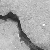

In [ ]:
from IPython.display import Image
from keras.preprocessing.image import load_img 
import warnings 
from keras.preprocessing.image import img_to_array 
import numpy as np
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
image = load_img(positive_image[0],color_mode = 'grayscale', target_size=(50,50)) 
print(type(image)) 
print(image.format) 
print(image.mode) 
print(image.size) 
display(image)

In [ ]:
from keras.preprocessing.image import load_img 
import warnings 
from keras.preprocessing.image import img_to_array 
import numpy as np
import pandas as pd

class MissingData(Exception):
  def __init(self,message):
    self.message = message
    super().__init__(self.message)
    

def images_to_dataframe(image_path_list):
  if len(image_path_list)==0 or type(image_path_list) == "undefined":
    raise MissingData('\nException: \nMissing Image List:\nEmpty list \
    is passed or no list passed.')
  else:
    parsed_image = []
    for i in image_path_list:
      image = load_img(i,color_mode = 'grayscale', target_size=(50,50)) 

      image_array = img_to_array(image) / 255.

      onedarr = np.ravel(image_array)

      parsed_image.append(onedarr)
    if len(parsed_image)>0:
      df = pd.DataFrame(parsed_image)
    else:
      raise Exception('Exception: \nParsed Image List is Empty.')
  return df

In [22]:
from keras.preprocessing.image import load_img 
import warnings 
from keras.preprocessing.image import img_to_array 
import numpy as np
import pandas as pd

class MissingData(Exception):
  def __init(self,message):
    self.message = message
    super().__init__(self.message)
    

def images_to_dataframe1(image_path_list):
  if len(image_path_list)==0 or type(image_path_list) == "undefined":
    raise MissingData('\nException: \nMissing Image List:\nEmpty list \
    is passed or no list passed.')
  else:
    parsed_image = []
    for i in image_path_list:
      img0 = cv2.imread(i)

# converting to gray scale
      gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
      #img = cv2.GaussianBlur(gray,(3,3),0)
      #laplacian = cv2.Laplacian(gray,cv2.CV_64F)
      #sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
      sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
# image_gaus = cv2.GaussianBlur(image,(3,3),0)
      img1 = cv2.resize(sobely, (50,50), interpolation = cv2.INTER_AREA)

      img2 = img1/255.

      onedarr = np.ravel(img2)

      parsed_image.append(onedarr)
    if len(parsed_image)>0:
      df = pd.DataFrame(parsed_image)
    else:
      raise Exception('Exception: \nParsed Image List is Empty.')
  return df

In [23]:
negative_df2 = images_to_dataframe1(negative_image)

In [24]:
negative_df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,-0.057499,-0.226470,0.440092,0.094617,0.136316,0.290172,0.258612,-0.345972,-0.465100,-0.016820,0.259178,0.300354,-0.020542,0.199931,0.079415,-0.034241,-0.206843,-0.282969,-0.351462,0.066213,0.167825,0.142625,-0.079071,-1.062409,-1.218694,-0.019870,-0.234259,0.246794,0.266435,-0.149962,0.048031,0.722292,0.459685,-0.267357,0.518307,0.368122,0.761750,0.402629,-0.261074,-0.236015,...,-0.267209,-0.208545,-0.016418,-0.086236,0.268112,-0.239268,-0.062433,-0.142050,-0.129032,0.142946,0.049423,-0.038117,0.050499,0.360256,0.009652,-0.085474,-0.196055,-0.155142,-0.300056,-0.328050,0.128418,0.377796,0.449810,0.306810,-0.198615,0.091182,0.529573,-0.264280,0.237699,-0.028319,0.089811,-0.083531,-0.197978,0.149030,-0.007529,0.018970,0.591296,0.019111,0.301784,-0.245814
1,0.663077,0.885430,0.900327,0.949194,1.024979,0.735663,0.756832,3.075024,1.472589,0.951035,-1.156431,0.702172,1.964405,1.199508,0.531995,1.141048,-1.347579,-0.614300,-2.248756,-2.842323,-2.233470,-0.231362,2.520898,2.150305,2.747403,2.788162,3.378200,2.457491,1.442998,0.588340,-1.963604,-0.740588,-0.727510,0.462367,1.304383,0.776092,0.046312,0.382588,-0.363539,0.298384,...,-0.135825,-0.103686,1.127014,-0.146996,0.021036,-0.073871,-0.834161,-1.346299,-0.548531,0.157911,-0.302003,0.053603,-0.082887,0.018270,-0.666265,-0.407123,-0.695293,0.040069,-0.129339,-0.522971,0.022134,0.915902,0.462706,-0.030597,-0.436265,-0.681268,-0.259086,0.299649,0.422520,-0.065042,-0.274424,-0.447454,0.952674,1.065428,1.133567,0.429937,0.045089,-0.130969,0.267614,-0.081949
2,-0.327826,0.121560,0.540680,-0.714994,0.908825,0.676346,-0.075099,-0.605643,-0.020585,-0.018105,-0.103694,-0.113425,0.285164,-0.020132,0.066579,0.020412,-0.356795,0.421335,0.396795,-0.784001,-0.396903,0.275669,0.234123,-0.046686,-0.277069,-0.264404,0.930950,0.829031,-0.111222,-0.944525,-0.644069,0.128200,0.574828,0.565864,0.323521,0.008549,0.116055,0.357825,0.163181,0.047520,...,-0.393766,0.168028,-0.257510,0.208421,0.067773,0.389414,-0.069074,-1.103826,-0.361054,-0.498961,-0.821945,-0.093456,-0.114837,0.097302,0.155438,0.414136,-0.065730,0.541943,0.212379,1.323751,1.732893,1.301403,-0.057672,-0.552714,-0.688471,0.000556,0.093223,-0.038867,-0.970620,-1.149389,-0.477645,0.275478,-0.171356,-0.086508,0.091974,0.038585,0.058219,-0.063122,0.097599,-0.550152
3,-1.412499,0.173885,2.059918,1.064155,0.082682,1.399559,3.161983,0.717442,-1.309877,-0.075763,-1.925546,-0.375284,-0.115789,-1.604011,0.195428,0.407375,0.097286,-0.062098,-2.038732,-1.279549,1.094573,-0.460339,0.449887,-0.113258,-0.571151,-0.719136,0.565892,1.291502,1.986951,1.593569,0.145538,0.759680,-0.120997,-0.767330,-1.559716,-2.398125,-3.246158,-3.043110,-4.328912,-4.938317,...,-0.526537,0.236878,-0.862168,-1.453419,0.104854,0.541877,0.605984,0.651377,-0.180799,0.376950,-0.569919,0.876549,0.458317,0.952666,0.254661,0.185899,0.606341,-0.324457,-2.050309,-2.194791,-0.477155,-1.363523,-2.028449,-0.189120,-1.831117,-1.038452,-1.567806,-3.671278,0.509483,1.088998,-0.059237,1.404912,1.749320,1.281575,1.258039,2.003566,1.730537,1.084233,0.195902,-1.428610
4,0.352251,0.061022,0.275258,0.178245,0.065880,-0.017966,-0.203762,-0.338257,0.079821,-0.001622,0.084536,0.093954,-0.130427,0.099101,0.204494,0.253651,0.063878,0.410564,0.369503,0.057812,-0.133100,0.046532,0.519194,0.114090,-0.247220,0.024393,0.004643,-0.227618,0.038574,-0.120957,-0.304298,-0.141550,-0.482152,-0.676902,-0.111630,-0.417897,-0.467196,0.336253,0.189907,-0.103359,...,-0.259316,0.012123,-0.281479,-0.161892,0.142027,0.224658,0.109801,0.067268,0.366559,0.204688,0.300597,0.210618,0.508292,-0.135666,-0.184648,0.222607,0.044719,-0.497456,-0.365142,-0.024768,-0.173383,-0.133415,0.251513,-0.048966,0.317407,0.054089,

In [25]:
positive_df2 = images_to_dataframe1(positive_image)

In [26]:
positive_df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,-0.107340,0.218561,0.400216,0.378546,0.147558,-0.134746,0.387421,0.534031,0.183863,0.515311,0.962958,0.367121,-0.124585,0.171769,0.112324,0.253394,0.426854,-0.479756,-0.666820,0.197408,0.449376,0.389439,-0.161717,0.430570,1.353024,0.283514,-0.008359,-0.659889,0.400968,0.514168,0.096366,0.465274,0.039023,-0.444560,-0.313813,-0.637481,-0.512920,-0.102819,0.028581,-0.392851,...,-0.145804,-0.096573,0.460784,0.784679,0.476508,-0.034673,0.254122,0.243384,0.399790,-0.005260,0.068750,-0.119043,0.093184,0.200031,-0.149783,-0.327838,0.036999,-0.071748,-0.271828,-0.425051,0.106278,0.276981,0.000542,0.145836,0.102930,0.178533,0.315013,0.258790,-0.214837,-0.089413,-0.496464,0.390324,0.204677,0.112054,0.026613,-0.099590,-0.107023,0.154502,0.017755,-0.068673
1,0.197509,-0.033514,0.072726,-0.146623,-0.092825,0.009795,-0.369605,-0.212281,0.061251,-0.312684,-0.280615,0.177451,0.315974,-0.692051,-0.284480,0.064305,0.330491,0.573683,0.251625,-0.361758,0.180850,-0.049916,-0.074742,-0.000322,0.062468,-0.459242,-0.245379,0.045248,-0.293739,-0.040778,-0.583643,-0.358107,0.264470,0.778797,0.854499,0.292498,0.122892,0.337652,0.432561,-0.114127,...,0.199569,0.484278,0.487268,0.274133,-1.817019,-0.861842,-0.103185,0.598615,0.970575,0.480391,0.089571,-0.026891,-0.012921,0.006990,0.023039,0.024293,0.191576,0.419847,0.365610,0.464954,-0.009389,-0.315598,-0.665802,-0.100066,-0.167136,0.118569,0.032382,-0.780983,-0.835854,-0.459971,-0.456088,-0.582108,-0.169645,-0.437430,-2.096425,-0.515934,-0.482070,-0.806987,0.059919,0.293158
2,0.245035,0.012176,0.087025,0.198047,0.117333,0.128152,0.143342,0.353055,0.257325,-0.159570,-0.128881,-0.148964,-0.265096,-0.033825,-0.014947,0.150370,0.463905,-0.034390,-0.086259,-0.047636,-0.339978,0.118376,0.284084,0.181501,-0.157134,-0.242650,0.054731,-0.266292,-0.614047,-0.205630,0.010002,-0.062859,-0.074585,0.129815,-0.294907,0.036116,-0.038653,0.348296,0.112140,-0.113653,...,0.195273,0.012514,-0.137131,-0.248297,-0.010463,0.155035,-0.272826,-0.333491,-0.092323,0.045894,0.307578,0.010544,-0.340504,-0.181893,0.030675,0.304695,0.423043,0.428863,0.186905,0.365919,-0.064703,-0.262219,-0.091487,0.106781,0.752628,0.394593,0.798248,2.004571,0.331388,0.139242,0.059041,-0.173206,0.026495,0.553571,-0.198886,-0.585436,-0.114289,-0.013985,-0.126585,-0.176425
3,0.902253,0.215939,0.138323,-0.157650,-0.348866,0.184814,-0.507465,-0.452243,0.086230,0.197631,0.274019,0.048108,-0.304695,-0.405374,-0.365267,0.364820,0.212192,0.015618,-0.230792,0.384825,0.789310,0.824875,0.496494,0.366231,-0.166285,0.072237,-0.265701,-0.072943,0.219319,-0.166213,-0.057374,0.116432,-0.132159,-0.576137,-0.431561,1.016662,1.230249,1.144297,0.263005,-0.258504,...,-0.121910,0.029233,0.046571,0.135707,0.298801,0.222452,-0.194264,-0.027708,0.154642,0.150735,0.104320,0.183526,0.130039,0.150267,-0.090463,0.101600,0.807718,0.606123,-0.430557,-0.233676,0.036466,0.229774,-0.000351,0.234400,0.461270,0.250866,-0.239278,-0.673481,1.098154,0.503800,0.478031,0.197099,0.159020,-0.012932,0.164957,-0.111702,-0.137431,0.083237,-0.171130,0.143270
4,0.665266,0.807966,0.661977,-0.029956,2.918367,4.300179,1.560117,3.858914,8.489088,6.042237,6.563005,6.403672,1.340614,0.416267,0.515428,-2.212906,-14.261235,-10.928170,-0.410887,0.568079,0.254550,-0.142375,2.170503,0.711991,1.252769,0.820284,1.355993,-0.128475,-0.151873,0.249590,-0.189311,0.249597,0.697731,0.884662,2.345323,1.483694,1.594170,-0.408072,-0.258755,0.235363,...,0.222911,-0.087802,0.241955,0.260730,0.452761,0.085963,-0.103031,-0.522863,-0.720284,-0.376135,2.717838,1.094176,-0.028915,-0.140279,0.097857,0.247494,-0.223705,0.690557,-0.496976,-3.842457,-0.485679,2.682216,0.196495,-0.329964,0.488988,1.893715,-0.262516,0.06389

In [27]:
negative_df2['target'] = [0]*20000

In [28]:
positive_df2['target'] = [1]*20000

In [29]:
data2 = pd.concat([negative_df2,positive_df2])

In [30]:
data2.to_csv('sobely.csv')

In [31]:
!mv '/content/sobely.csv' '/content/drive/My Drive'

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 19999
Columns: 2501 entries, 0 to target
dtypes: float64(2500), int64(1)
memory usage: 763.5 MB


In [ ]:
#images_to_dataframe(negative_image[1:100]).to_csv('negative.csv',mode='a')
negative_df = images_to_dataframe(negative_image)

KeyboardInterrupt: ignored

In [ ]:
negative_df['target'] = [0]*20000

In [ ]:
positive_df = images_to_dataframe(positive_image)

In [ ]:
positive_df['target'] = [1]*20000

In [ ]:
data = pd.concat([negative_df,positive_df])

In [ ]:
data.to_csv('data.csv')

In [ ]:
!mv '/content/data.csv' '/content/drive/My Drive'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 19999
Columns: 2501 entries, 0 to target
dtypes: float64(2500), int64(1)
memory usage: 763.5 MB


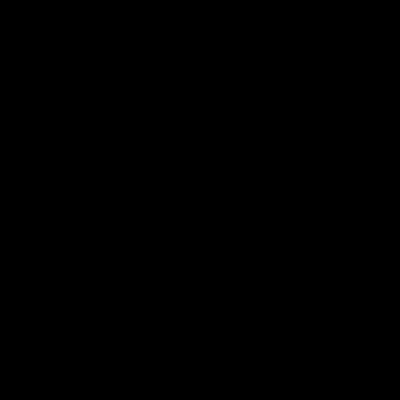

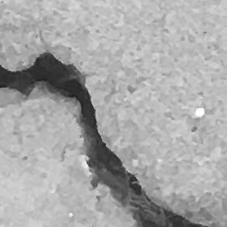

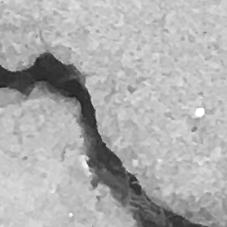

In [ ]:

ksize = 5  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 0.1 #Large sigma on small features will fully miss the features. 
theta = 3*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
lamda = 1*np.pi /4  #1/4 works best for angled. 
gamma=0.2  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0  #Phase offset. I leave it to 0. 


kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

img = cv2.imread(positive_image[0])
#img = cv2.imread('BSE_Image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

kernel_resized = cv2.resize(kernel, (400, 400))                    # Resize image
cv2_imshow(kernel_resized)
cv2_imshow(img)
cv2_imshow(fimg)

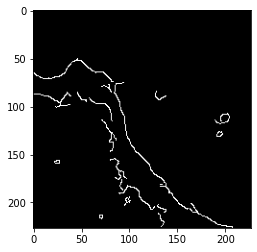

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
#img0 = cv2.imread('SanFrancisco.jpg',)
img0 = cv2.imread(positive_image[0])

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y
canny_edges = cv2.Canny(img,100,200)

# plt.subplot(3,2,1),plt.imshow(img,cmap = 'gray')
# plt.title('Original'), plt.xticks([]), plt.yticks([])
# plt.subplot(3,2,2),plt.imshow(laplacian,cmap = 'gray')
# plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
# plt.subplot(3,2,3),plt.imshow(sobelx,cmap = 'gray')
# plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
# plt.subplot(3,2,4),plt.imshow(sobely,cmap = 'gray')
# plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
# plt.subplot(3,2,5),plt.imshow(canny_edges,cmap = 'gray')
# plt.title('Canny Edge'), plt.xticks([]), plt.yticks([])

plt.imshow(canny_edges,cmap="gray")
plt.show()